You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

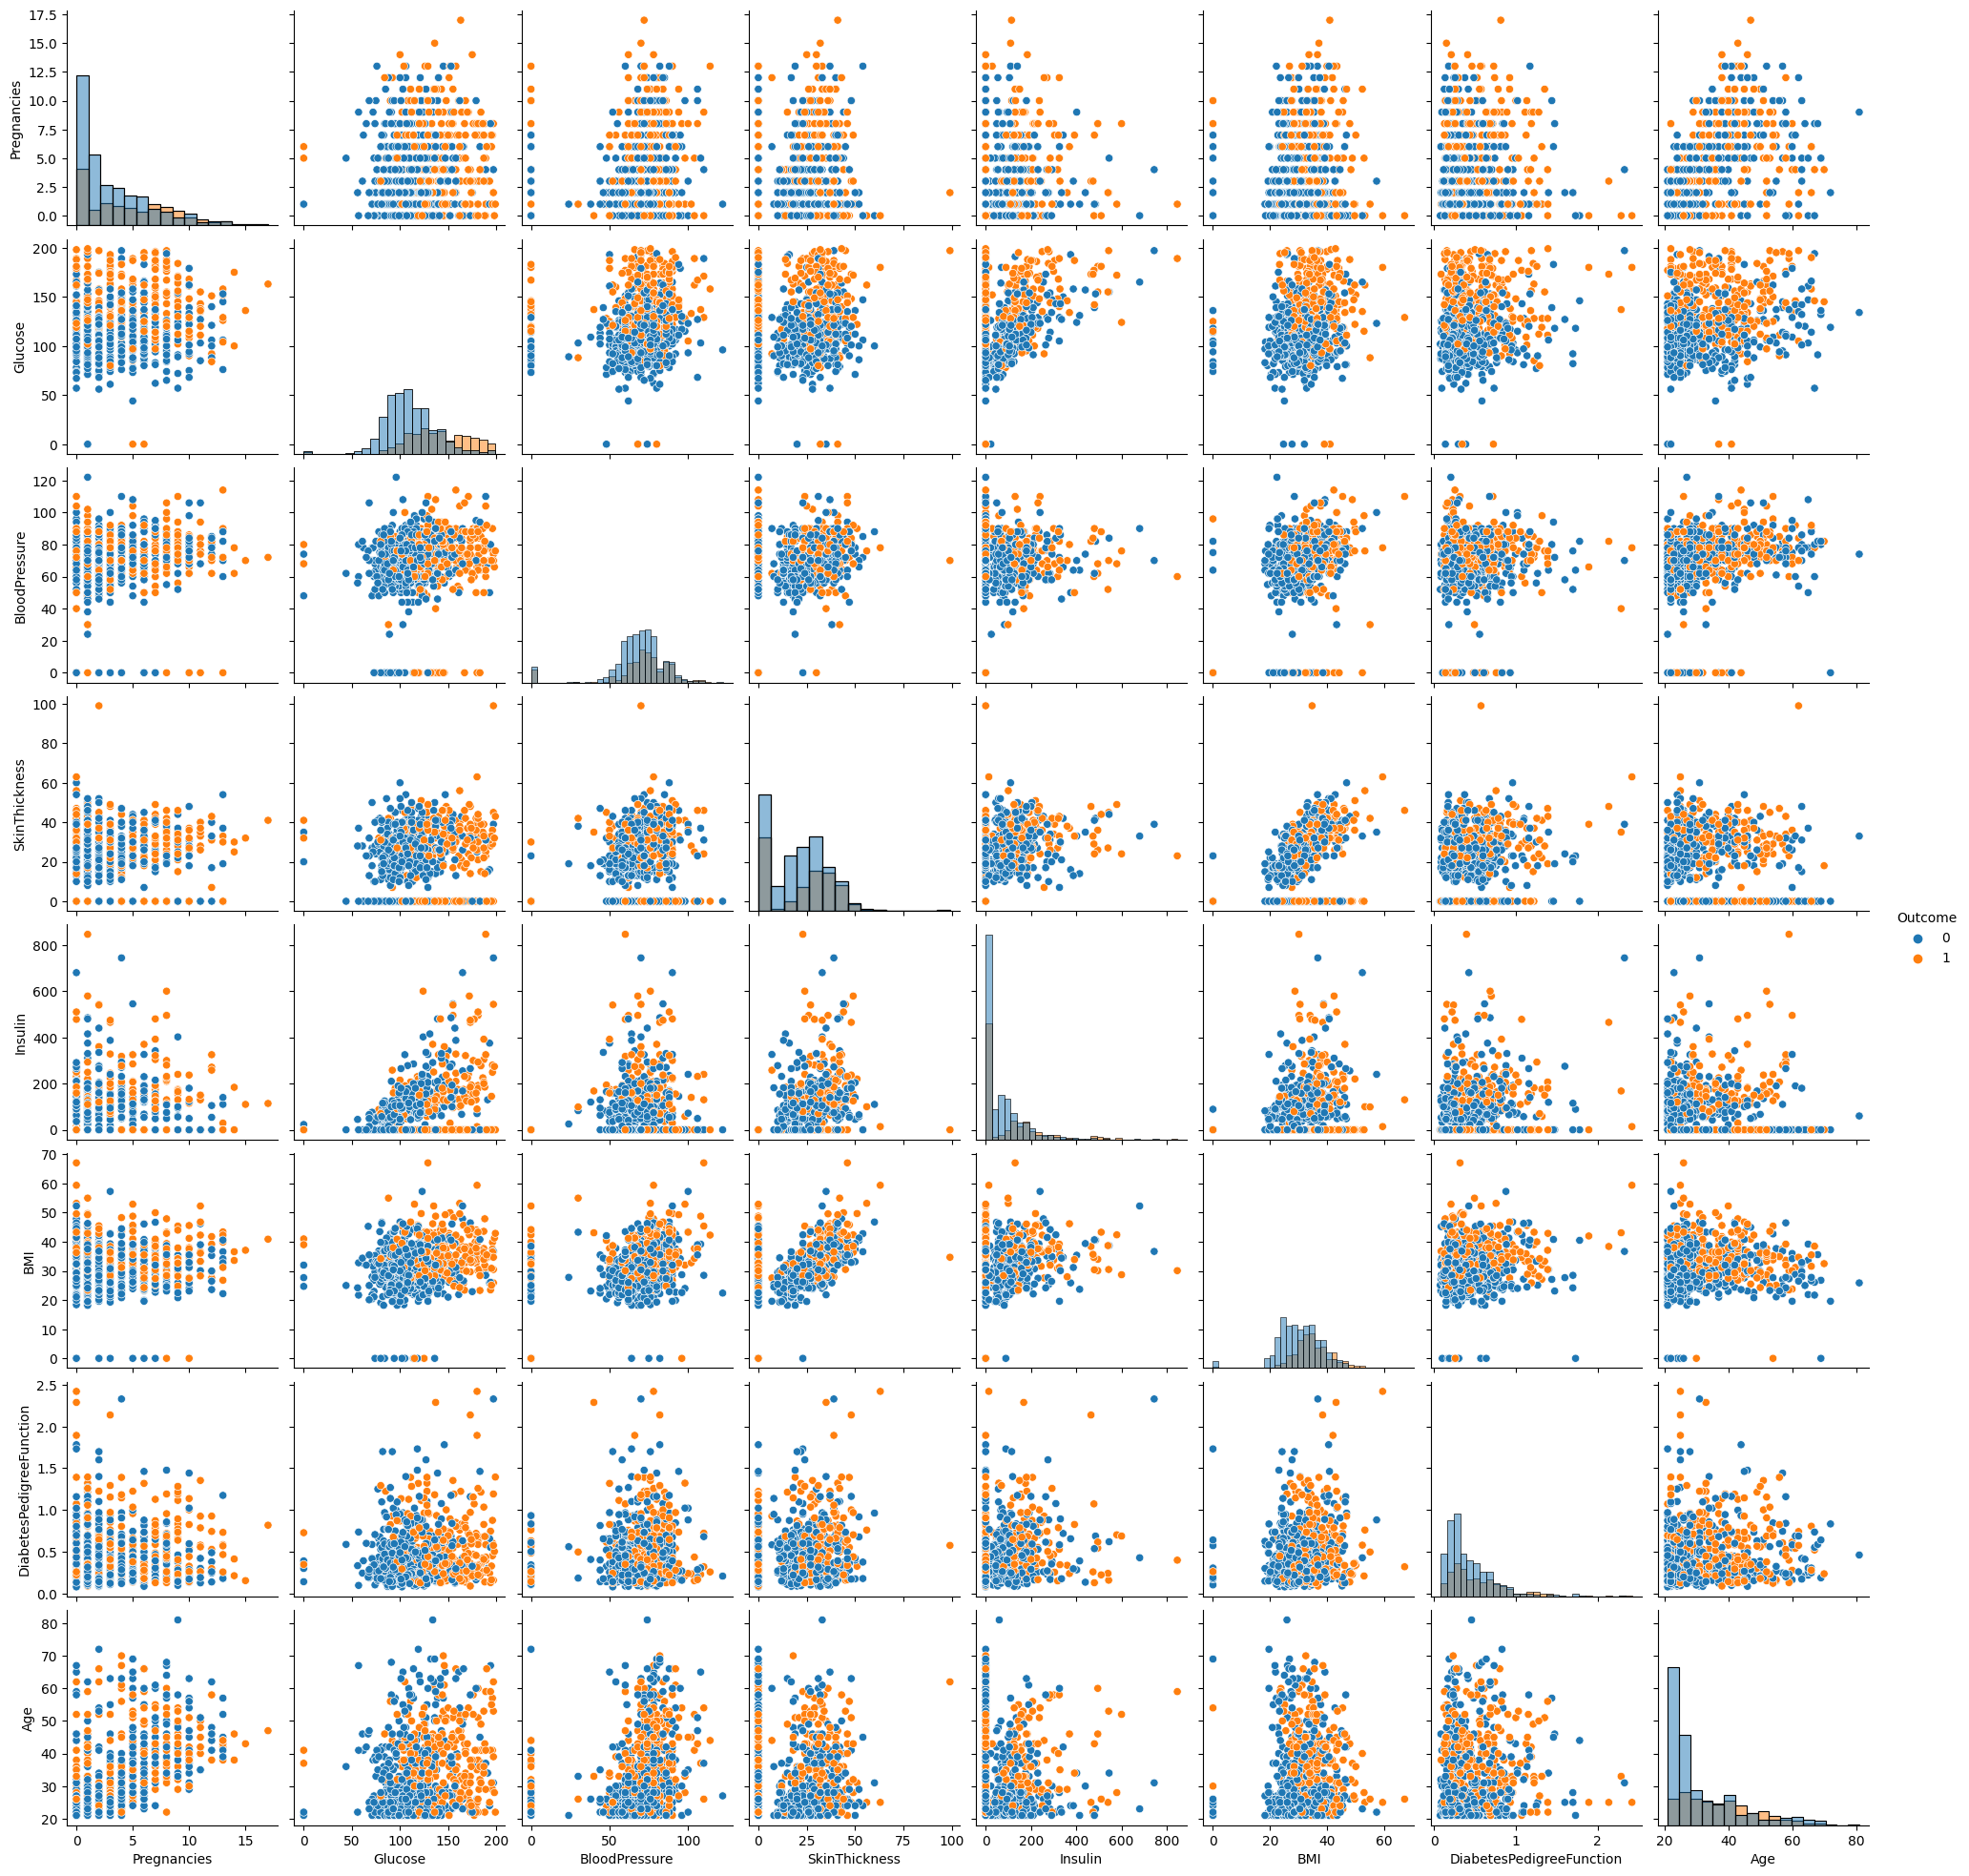

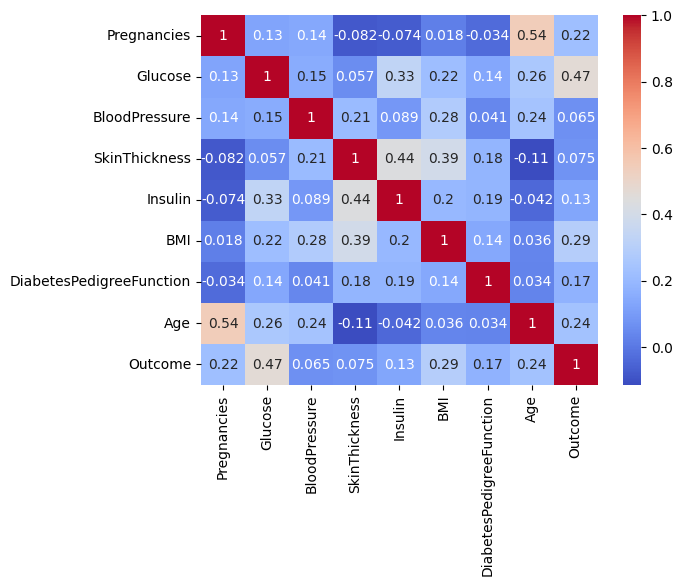

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/diabetes.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Check descriptive statistics of the variables
print(data.describe())

# Visualize the distributions of variables
sns.pairplot(data, hue='Outcome', diag_kind='hist')
plt.show()

# Check correlations between variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Identify outliers using Z-score
from scipy import stats

z_scores = stats.zscore(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

# Example: If there's a categorical variable named 'Gender'
#data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [5]:
from sklearn.model_selection import train_test_split


# Split features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Set random seed for reproducibility
random_seed = 42

# Split the data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Check the shapes of the resulting sets
print("Train set - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)


Train set - Features: (529, 8) Target: (529,)
Test set - Features: (133, 8) Target: (133,)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=random_seed)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train a decision tree model using the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(**best_params, random_state=random_seed)
best_tree_classifier.fit(X_train, y_train)


Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=42)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.7143
Precision: 0.6000
Recall: 0.6250
F1 Score: 0.6122

Confusion Matrix:
[[65 20]
 [18 30]]


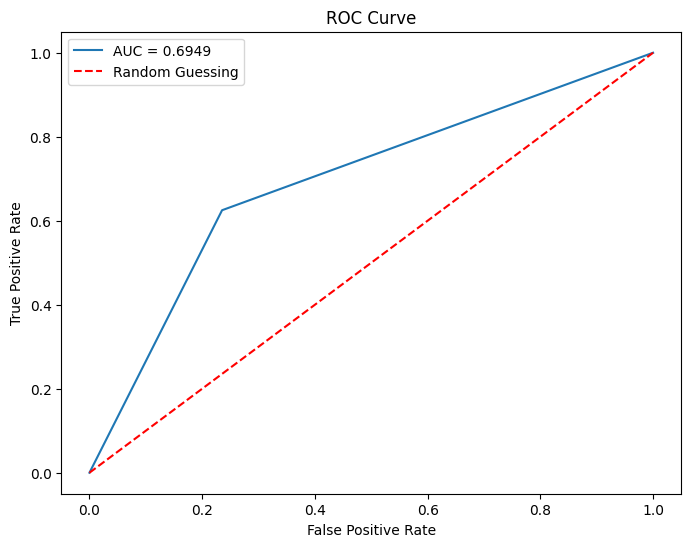

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Instantiate the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

[Text(0.5590469613259669, 0.9615384615384616, 'x[1] <= 143.5\ngini = 0.429\nsamples = 529\nvalue = [364, 165]'),
 Text(0.2921270718232044, 0.8846153846153846, 'x[7] <= 28.5\ngini = 0.333\nsamples = 421\nvalue = [332, 89]'),
 Text(0.18093922651933703, 0.8076923076923077, 'x[1] <= 133.0\ngini = 0.163\nsamples = 224\nvalue = [204, 20]'),
 Text(0.13535911602209943, 0.7307692307692307, 'x[0] <= 7.0\ngini = 0.119\nsamples = 204\nvalue = [191, 13]'),
 Text(0.12430939226519337, 0.6538461538461539, 'x[6] <= 1.28\ngini = 0.111\nsamples = 203\nvalue = [191, 12]'),
 Text(0.1132596685082873, 0.5769230769230769, 'x[3] <= 28.5\ngini = 0.103\nsamples = 202\nvalue = [191, 11]'),
 Text(0.04419889502762431, 0.5, 'x[5] <= 35.95\ngini = 0.042\nsamples = 139\nvalue = [136, 3]'),
 Text(0.022099447513812154, 0.4230769230769231, 'x[5] <= 33.25\ngini = 0.016\nsamples = 127\nvalue = [126, 1]'),
 Text(0.011049723756906077, 0.34615384615384615, 'gini = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(0.03314917127071

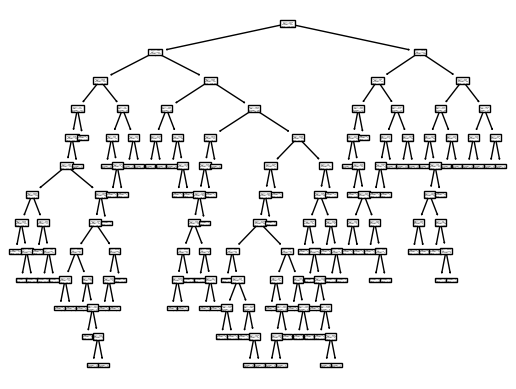

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Assuming you have already split the data into X_train, X_test, y_train, y_test

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Visualize the decision tree (optional but helpful for interpretation)
tree.plot_tree(clf)


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.


Validating a decision tree model involves assessing its performance on unseen or new data and testing its robustness to changes in the dataset or environment. Here are some approaches to validate and test the decision tree model for identifying patients with diabetes:

### 1. Test the Model on a Holdout Dataset:
- Use the test set (`X_test`, `y_test`) created earlier to evaluate the model's performance metrics like accuracy, precision, recall, and F1-score.
- Assess the confusion matrix to understand the model's ability to correctly classify diabetic and non-diabetic patients.


### 2. Cross-Validation:
- Perform k-fold cross-validation to ensure the model's stability and generalizability. This technique divides the dataset into k subsets, using each as a test set while training on the remaining k-1 subsets.


### 3. Sensitivity Analysis and Scenario Testing:
- Conduct sensitivity analysis by perturbing certain variables or features within a range to observe the impact on model predictions.
- For scenario testing, simulate changes in certain variables (e.g., glucose levels, BMI) to assess how the model reacts to different patient profiles.

For instance, modify certain features within a reasonable range and observe how the model predictions change or remain stable.

### 4. Robustness Testing:
- Introduce noise or artificial errors into the dataset to evaluate the model's robustness. Assess how well it handles noisy or imperfect data.

By conducting these validation techniques, sensitivity analysis, and scenario testing, you can gain insights into the model's performance, its stability across different datasets or scenarios, and its sensitivity to changes in input variables or environmental factors. This helps assess the model's reliability in identifying patients with diabetes in various real-world conditions.

In [10]:
## Test the Model on a Holdout Dataset:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have the trained classifier 'clf' and test data 'X_test', 'y_test'

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

## Cross-Validation
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5)  # Assuming clf is the trained classifier
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())



Accuracy: 0.7142857142857143
Confusion Matrix:
 [[65 20]
 [18 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77        85
           1       0.60      0.62      0.61        48

    accuracy                           0.71       133
   macro avg       0.69      0.69      0.69       133
weighted avg       0.72      0.71      0.72       133

Cross-validation Scores: [0.69924812 0.66165414 0.66666667 0.71212121 0.67424242]
Mean CV Accuracy: 0.6827865117338802
